## **Dataset unzip and save to the Drive folder**

In [ ]:
# Dataset unzip in the folder for processing (One time process) uncomment for unzip
# !unzip /content/drive/MyDrive/keypoint_detection/kaggle_facial_keypoint_dataset.zip -d /content/drive/MyDrive/keypoint_detection/


In [ ]:
# ! pip install seedir
# import seedir as sd
# sd.seedir('/content/drive/MyDrive/keypoint_detection/', style ='spaces')

keypoint_detection/
  training.csv
  kaggle_facial_keypoint_dataset.zip
  images/
    test_images/
      1021.jpg
      1547.jpg
      1447.jpg
      1216.jpg
      1496.jpg
      1543.jpg
      1125.jpg
      1362.jpg
      1120.jpg
      186.jpg
      1137.jpg
      1634.jpg
      1018.jpg
      1348.jpg
      1542.jpg
      1749.jpg
      1354.jpg
      1176.jpg
      1590.jpg
      1371.jpg
      122.jpg
      1508.jpg
      1624.jpg
      1352.jpg
      203.jpg
      103.jpg
      1524.jpg
      1591.jpg
      177.jpg
      1457.jpg
      1200.jpg
      149.jpg
      179.jpg
      1597.jpg
      1777.jpg
      1726.jpg
      1360.jpg
      1504.jpg
      167.jpg
      143.jpg
      1318.jpg
      1186.jpg
      1313.jpg
      1188.jpg
      1669.jpg
      1178.jpg
      1375.jpg
      1514.jpg
      1737.jpg
      1361.jpg
      1574.jpg
      1532.jpg
      1426.jpg
      1406.jpg
      1000.jpg
      1157.jpg
      1680.jpg
      1658.jpg
      140.jpg
      1451.jpg
      1579.

## **Mount Google Drive**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Drive mount one time
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Check if the file exists
# !ls
# !ls "/content/drive/MyDrive/keypoint_detection/"

In [ ]:
# datapath
# /content/drive/Mydrive/keypoint_detection/

## **Required libraries and packages import**

In [ ]:
# imports for the development of network and training and testing pipeline
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from sklearn.model_selection import train_test_split
import random
import pandas as pd
import cv2  # OpenCV
import numpy as np
# Function to show images in the notebook
%matplotlib inline
print(tf.__version__) # tensorflow version check
print("GPU Available: ", tf.config.list_physical_devices('GPU')) # GPU availability check


2.15.0
GPU Available:  []


# **Preparing data for model building**

In [ ]:
# Function to load images and keypoints from a directory
def load_images_and_keypoints(directory_path, csv_file_path):
    image_data = []
    keypoints_data = []

    # Load CSV file with keypoints information
    keypoints_df = pd.read_csv(csv_file_path)
    files = os.listdir(directory_path)
    files.sort(key=lambda x: int(x.split('.')[0])) # sorting files in a sequence
    # print (files)

    for filename in files:
        if filename.endswith(".jpg"):  # Adjust the file extension based on your image format
            img_path = os.path.join(directory_path, filename)
            img = cv2.imread(img_path)
            # print(img.shape)
            img = cv2.resize(img, (96, 96))  # Adjust the size
            image_data.append(img)

            # Extract keypoints for the current image
            row =int(filename.split('.')[0])
            # print('row:', row)
            keypoints = keypoints_df.iloc[row, :].values  # Assuming columns 0 and onwards are x, y coordinates
            keypoints_data.append(keypoints)

    return np.array(image_data), np.array(keypoints_data)


# **Saving the dataset into the numpy array for loading (one time task)**

In [ ]:
# # one time process to saving dataset into npz format
# # Directory containing images
# image_directory ="/content/drive/MyDrive/keypoint_detection/images/train_images/" # train images

# # CSV file containing keypoints information
# csv_file_path = "/content/drive/MyDrive/keypoint_detection/processed_training_labels.csv"

# # Load images and keypoints
# image_data, keypoints_data = load_images_and_keypoints(image_directory, csv_file_path)

# # saving images and keypoints for future use to the drive
# # # saving into numpy array

# data_save_directory ="/content/drive/MyDrive/keypoint_detection/images/" # npz file

# # Save images and keypoints into a single .npz file
# np.savez(data_save_directory+'processed_keypoint_data.npz', images=image_data, keypoints=keypoints_data)

# # Validation of the images and corresponding keypoints through visualization of random samples
# print(image_data.shape, keypoints_data.shape)
# print(type(image_data), type(keypoints_data))
# print(keypoints_data[10, :])
# plt.imshow(image_data[10,:,:,:].reshape(96, 96, 3))

# **Loading saved dataset from the drive**

(7049, 96, 96, 3) (7049, 30)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[64.33293617 34.9700766  29.9492766  33.44871489 58.85617021 35.27434894
 70.7227234  36.18716596 36.0347234  34.36153191 24.47251064 33.14444255
 53.98740426 28.27594894 78.63421277 30.4059234  42.72885106 26.14604255
 16.8653617  27.05885957 48.20629787 55.66093617 56.42144681 76.352
 35.12238298 76.04765957 46.68459574 70.26655319 45.46791489 85.48017021]


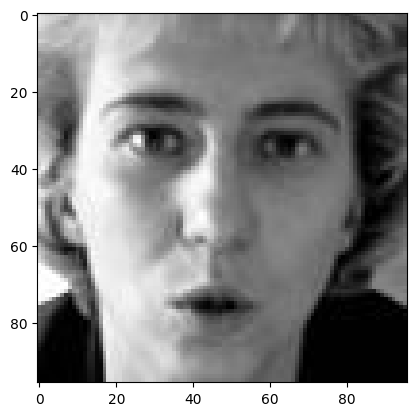

In [ ]:
# Load the .npz file from the drive for preparation of the data to training and testing
data_save_directory ="/content/drive/MyDrive/keypoint_detection/images/" # npz file
loaded_data = np.load(data_save_directory+'processed_keypoint_data.npz')

# Access images and labels from loaded data
loaded_images = loaded_data['images']
loaded_keypoints = loaded_data['keypoints']

# Validation of the images and corresponding keypoints through visualization of random samples
print(loaded_images.shape, loaded_keypoints.shape)
print(type(loaded_images), type(loaded_keypoints))
print(loaded_keypoints[1, :])
plt.imshow(loaded_images[1,:,:,:].reshape(96, 96, 3))


# **Preparing the Train, Val, Test Split (train = 0.8, validation  = 0.1, test = 0.1)**
Total samples = 7049,
Train = 5639,
Validation = 705,
Test = 705

In [ ]:
# Splitting the dataset into train validation and test (train = 0.8, validation  = 0.1, test = 0.1)

# Split the data into training, validation, and testing sets
train_data, temp_data, train_keypoints, temp_keypoints = train_test_split(
    loaded_images, loaded_keypoints, test_size=0.2, random_state=42
)

# Further split the remaining data into validation and test sets
validation_data, test_data, validation_keypoints, test_keypoints = train_test_split(
    temp_data, temp_keypoints, test_size=0.5, random_state=42
)

# train_data, validation_data, and test_data along with
# train_keypoints, validation_keypoints, and test_keypoints to train,
# validate, and test neural network

In [ ]:
print('shape of images (Train,Val, Test):',train_data.shape, validation_data.shape, test_data.shape)
print('shape of keypoints (Train,Val, Test):',train_keypoints.shape, validation_keypoints.shape, test_keypoints.shape)

shape of images (Train,Val, Test): (5639, 96, 96, 3) (705, 96, 96, 3) (705, 96, 96, 3)
shape of keypoints (Train,Val, Test): (5639, 30) (705, 30) (705, 30)


# **Neural network for keypoint detection**

In [ ]:
### Network configurable parameters
# image size is 96*96*3 and there are 30 keypoints (columns in labels)

params = {'input_shape': (96,96,3), 'num_keypoints': 30, 'learning_rate': 1e-5,
          'loss': 'mean_squared_error', 'metric': ['mae']}

In [ ]:
# neural network for the keypoint detection
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


# base network
def base_keypoint_detection_net(input_shape, num_keypoints):
  input_layer = tf.keras.Input(shape=input_shape, name='input_image')
  x = layers.Conv2D(32, (3, 3), activation='relu')(input_layer)
  x = layers.MaxPooling2D((2, 2))(x)
  x = layers.Conv2D(64, (3, 3), activation='relu')(x)
  x = layers.MaxPooling2D((2, 2))(x)
  x = layers.Conv2D(128, (3, 3), activation='relu')(x)
  x = layers.MaxPooling2D((2, 2))(x)
  x = layers.Flatten()(x)
  x = layers.Dense(512, activation='relu')(x)
  output_layer = layers.Dense(num_keypoints, activation='linear')(x)  # 30 keypoints including coordinates (x, y) of each keypoints

  model = models.Model(inputs=input_layer, outputs=output_layer)
  return model


# **Model compilation and summary and visualization of the model**

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 96, 96, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 47, 47, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 22, 22, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856 

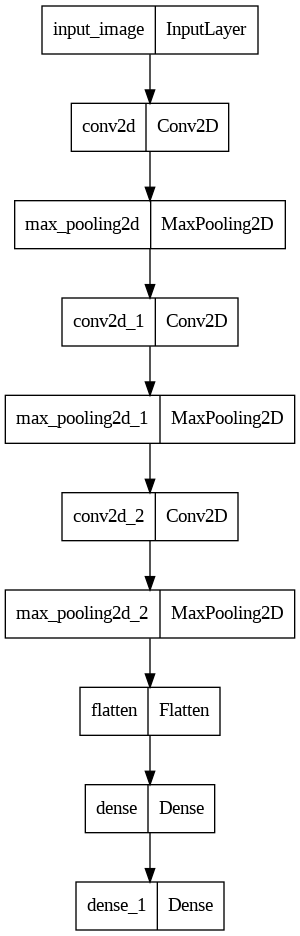

In [ ]:
# calling model and compile and summary
model = base_keypoint_detection_net(params['input_shape'], params['num_keypoints'])
# Compile the model (with optimizer = adam , loss = meas squared error and metrics = mean_absolute_error)
model.compile(optimizer=  Adam(learning_rate=params['learning_rate']), loss=params['loss'],
              metrics=params['metric'])

# Display the model summary
model.summary()
save_path = '/content/drive/MyDrive/keypoint_detection/model_results/base_model/'

def myprint(s):
    with open(save_path+'base_model_summary.txt','a') as f:
        print(s, file=f)

model.summary(print_fn=myprint)
tf.keras.utils.plot_model(model, to_file=save_path+'base_model_plot.png')

# **Model training, loss plotting and saving the trained model**

Epoch 1/200
177/177 [==============================] - 119s 648ms/step - loss: 256.4418 - mae: 10.3095 - val_loss: 92.9109 - val_mae: 7.1907
Epoch 2/200
177/177 [==============================] - 100s 563ms/step - loss: 78.4468 - mae: 6.5855 - val_loss: 74.2624 - val_mae: 6.3063
Epoch 3/200
177/177 [==============================] - 99s 559ms/step - loss: 65.3947 - mae: 5.9555 - val_loss: 64.9618 - val_mae: 5.8229
Epoch 4/200
177/177 [==============================] - 98s 552ms/step - loss: 58.1595 - mae: 5.5962 - val_loss: 60.2208 - val_mae: 5.6185
Epoch 5/200
177/177 [==============================] - 99s 559ms/step - loss: 53.2276 - mae: 5.3433 - val_loss: 55.5433 - val_mae: 5.3296
Epoch 6/200
177/177 [==============================] - 96s 544ms/step - loss: 48.8521 - mae: 5.1072 - val_loss: 53.2266 - val_mae: 5.2597
Epoch 7/200
177/177 [==============================] - 96s 545ms/step - loss: 46.3031 - mae: 4.9661 - val_loss: 52.5709 - val_mae: 5.3193
Epoch 8/200
177/177 [=========

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


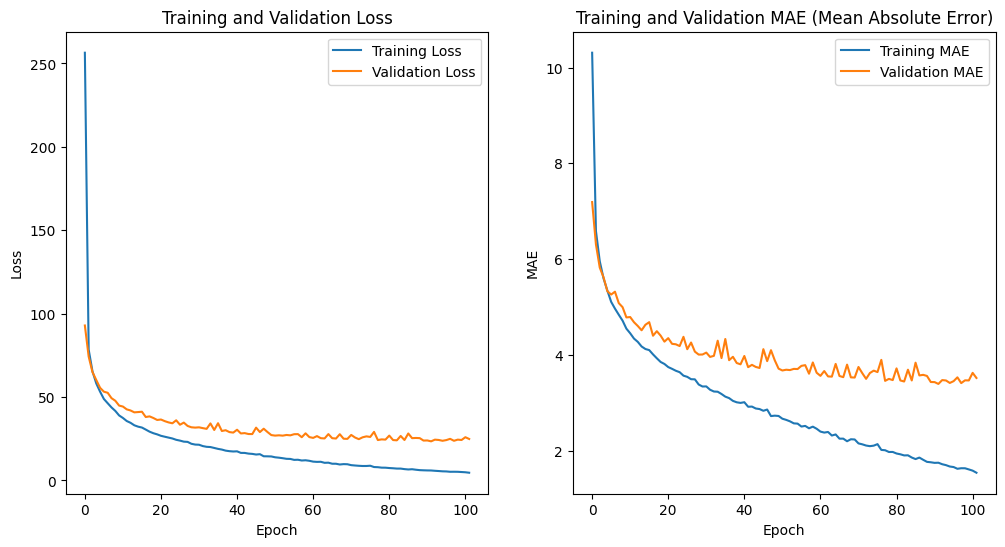

In [ ]:
# Train network
# EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history= model.fit(
    train_data, train_keypoints,
    epochs=200,
    batch_size=32,
    validation_data=(validation_data, validation_keypoints),
    callbacks=[early_stopping]
)


# Save the model
model.save(save_path+'trained_base_model_keypoint_detection.h5')

# Plot training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# # Save the training and validation loss plot
# plt.savefig(save_path+'training_validation_loss_plot.png')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE (Mean Absolute Error)')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

# Save the training and validation accuracy plot
plt.savefig(save_path+'training_validation_loss_plot.png')
plt.show()
plt.close()

# **Trained model loading and predictions saving in CSV file**

In [ ]:
from tensorflow.keras.models import load_model

# Load the trained model
save_path = '/content/drive/MyDrive/keypoint_detection/model_results/base_model/'
model = load_model(save_path+'base_model_keypoint_detection.h5')

# Predict keypoints on test data
predictions = model.predict(test_data)


# # Create a DataFrame to store the results
# colums as per the training keypoints data
columns = ['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y']
results_df = pd.DataFrame(predictions, columns= columns)

# # Save results to CSV
results_df.to_csv(save_path+'keypoint_predictions.csv', index=False)

23/23 [==============================] - 3s 116ms/step


# **Visualization of sample images with GT and predicted keypoints**

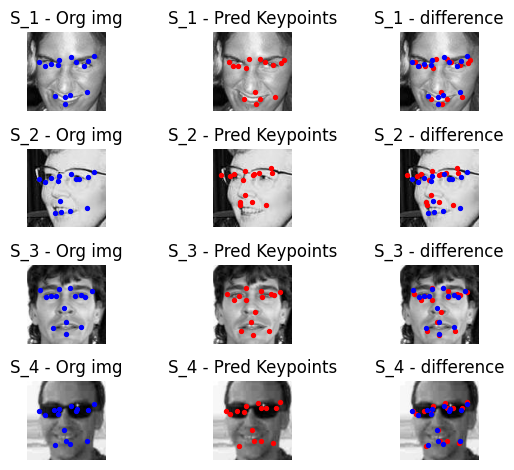

In [ ]:
# Visualize random samples and the keypoint results with ground truth
num_samples = 4
sample_indices = np.random.choice(len(test_data), num_samples, replace=False)

for i, sample_index in enumerate(sample_indices):
    sample_image = test_data[sample_index]
    sample_prediction = predictions[sample_index]
    test_keys = test_keypoints[sample_index]

    # Plot the original image
    plt.subplot(num_samples, 3, 3*i+1)
    plt.imshow(sample_image)
    plt.scatter(test_keys[0::2], test_keys[1::2], color='blue', marker='o', s=8)
    plt.title(f'S_{i+1} - Org img')
    plt.axis('off')

    # Plot the image with predicted keypoints
    plt.subplot(num_samples, 3, 3*i+2)
    plt.imshow(sample_image)
    plt.scatter(sample_prediction[0::2], sample_prediction[1::2], color='red', marker='o', s=8)
    plt.title(f'S_{i+1} - Pred Keypoints')
    plt.axis('off')

     # Plot the image with predicted keypoints
    plt.subplot(num_samples, 3, 3*i+3)
    plt.imshow(sample_image)
    plt.scatter(sample_prediction[0::2], sample_prediction[1::2], color='red', marker='o', s=8)
    plt.scatter(test_keys[0::2], test_keys[1::2], color='blue', marker='o', s=8)
    plt.title(f'S_{i+1} - difference')
    plt.axis('off')

plt.tight_layout()
plt.savefig(save_path+'base_model_results.png')
plt.show()


In [ ]:
print(predictions.shape)
print(test_keypoints.shape)
print(sample_indices)
print(predictions[0])

(705, 30)
(705, 30)
[231 420 523 438]
[65.64952  34.357746 25.720182 35.776947 55.199852 34.96393  70.27181
 29.858416 34.852577 37.304928 18.64875  39.00412  51.365646 26.54302
 78.378815 24.402275 36.624676 28.72776  10.696592 33.416645 51.03315
 58.56101  73.57379  70.22348  35.28158  75.556335 51.655064 73.39887
 47.76723  73.108536]


# **Model perfromance evaluation using MAE**

In [ ]:
# measuring the perfromance metrics in terms of MAE
# A lower MAE indicates better accuracy.
from sklearn.metrics import mean_absolute_error

# Function to evaluate the performance of the model and return dataframe
def evaluate_keypoint_detection_performance(test_keypoints, predictions):
  # test_keypoints (ground truth) and predictions
  # Flatten the arrays to simplify the calculations
  test_keypoints_flat = test_keypoints.flatten() # Ground truth keypoints
  predictions_flat = predictions.flatten() # Predicted keypoints

  # Calculate Mean Absolute Error (MAE)
  mae = mean_absolute_error(test_keypoints_flat, predictions_flat)
  print(f'Mean Absolute Error: {round(mae,3)}')

  # thresholds for accuracy calculation
  thresholds = [5, 10, 15]  # threshold is x- pixel distance are considered as accurate
  mae_dict = {}
  for threshold in thresholds:
    # Calculate accuracy based on the threshold
    accuracy_percentage_mae = np.mean(np.abs(predictions - test_keypoints) < threshold) * 100
    mae_dict[f'MAE_threshold_pixels_{threshold}_in%'] = [round(accuracy_percentage_mae,3)]
    print(f'Accuracy Percentage (MAE)_threshold_{threshold}: {round(accuracy_percentage_mae,3)}%')
  new_dict = {'MAE': [round(mae, 3)], **mae_dict}
  # Create a DataFrame to store the results
  results_df = pd.DataFrame(new_dict)
  return results_df

# calling evaluate function and DataFrame to store the results
out_df = evaluate_keypoint_detection_performance(test_keypoints, predictions)

# Save the results to a CSV file
out_df.to_csv(save_path+'evaluation_results_base_model_keypoint.csv', index=False)

Mean Absolute Error: 3.438
Accuracy Percentage (MAE)_threshold_5: 77.962%
Accuracy Percentage (MAE)_threshold_10: 94.676%
Accuracy Percentage (MAE)_threshold_15: 98.572%


In [ ]:
out_df.head()

,MAE,MAE_threshold_pixels_5_in%,MAE_threshold_pixels_10_in%,MAE_threshold_pixels_15_in%
0,3.438,77.962,94.676,98.572
